In [10]:
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Flatten, Dense,Dropout, Activation
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import cv2


In [18]:
pre_model = Sequential()
pre_model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
pre_model.add(Convolution2D(64, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(64, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(128, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(128, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(Convolution2D(4096, (7, 7), activation='relu'))
pre_model.add(Dropout(0.5))
pre_model.add(Convolution2D(4096, (1, 1), activation='relu'))
pre_model.add(Dropout(0.5))
pre_model.add(Convolution2D(2622, (1, 1)))


In [19]:
from keras.models import model_from_json
pre_model.load_weights('vgg_face_weights.h5')
pre_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_27 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 112, 112, 128)    

In [20]:

pre_model = Model(pre_model.layers[0].input, pre_model.layers[-3].output)

pre_model.trainable = False

model = models.Sequential()
model.add(pre_model)
#model.add(layers.Conv2D(4096, (7, 7), activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Conv2D(4096, (1, 1), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(2622, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

print("훈련되는 가중치 수 : ", len(model.trainable_weights))

model.summary()

훈련되는 가중치 수 :  4
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 1, 1, 4096)        134260544 
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 4096)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 1, 1, 2622)        10742334  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2622)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2623      
Total params: 145,005,501
Trainable params: 10,744,957
Non-trainable params: 134,260,544
_________________________________________________________________


In [21]:
import os,sys,shutil

base_dir = r'C:\Users\Rentalhub\sub_python_workplace\face_img'

img_path = os.path.join(base_dir,'resize')

train_path = os.path.join(base_dir, 'train')
if(os.path.isdir(train_path) == False) :
    train_path = os.path.join(train_path, 'myface')
    os.mkdir(train_path)

validation_path = os.path.join(base_dir,'validation')
if(os.path.isdir(validation_path) == False) :
    validation_path = os.path.join(validation_path, 'myface')
    os.mkdir(validation_path)
    
test_path = os.path.join(base_dir,'test')
if(os.path.isdir(test_path) == False) :
    test_path = os.path.join(test_path, 'myface')
    os.mkdir(test_path)

img_lists = os.listdir(img_path)
for img_list in img_lists[:101] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, train_path)

for img_list in img_lists[101:126] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, validation_path)

for img_list in img_lists[126:] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, test_path)
print(train_path)
print(os.listdir(train_path))

C:\Users\Rentalhub\sub_python_workplace\face_img\train
['1_IMG_1306.JPG', '1_KakaoTalk_20170123_151439371.jpg', '1_KakaoTalk_20170125_233812488.jpg', '1_KakaoTalk_20170125_233814065.jpg', '1_KakaoTalk_20200102_203745806_09.jpg', '1_KakaoTalk_20200103_104501398.jpg', '1_KakaoTalk_20200103_104946014_12.jpg', '1_KakaoTalk_20200103_111549310_06.jpg', '1_KakaoTalk_20200103_112142722_19.jpg', '1_KakaoTalk_20200103_124940397_19.jpg', '1_KakaoTalk_20200103_124940397_27.jpg', '1_KakaoTalk_20200103_124940397_29.jpg', '1_KakaoTalk_20200103_125433617_04.jpg', '1_KakaoTalk_20200103_125433617_22.jpg', '1_KakaoTalk_20200123_203856280_18.jpg', '1_KakaoTalk_20200123_203856280_19.jpg', '1_KakaoTalk_20200123_204124572_01.jpg', '1_KakaoTalk_20200123_204124572_11.jpg', '1_KakaoTalk_20200123_204124572_13.jpg', '1_KakaoTalk_20200123_204124572_14.jpg', '1_KakaoTalk_20200611_064437134.jpg', '1_KakaoTalk_20200611_064437134_01.jpg', '1_KakaoTalk_20200611_064437134_02.jpg', '1_KakaoTalk_20200611_064437134_04.jpg'

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')


Found 101 images belonging to 1 classes.
Found 42 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


In [23]:
from keras import optimizers
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-5),
             metrics = ['acc'])

['/job:localhost/replica:0/task:0/device:GPU:0']


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 60,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 10)


Epoch 1/15
40/40 [==============================] - 12s 302ms/step - loss: 0.6841 - acc: 0.7722 - val_loss: 0.6756 - val_acc: 1.0000
Epoch 2/15
40/40 [==============================] - 11s 287ms/step - loss: 0.6566 - acc: 1.0000 - val_loss: 0.6340 - val_acc: 1.0000
Epoch 3/15
40/40 [==============================] - 12s 289ms/step - loss: 0.6253 - acc: 1.0000 - val_loss: 0.5918 - val_acc: 1.0000
Epoch 4/15
40/40 [==============================] - 12s 291ms/step - loss: 0.5983 - acc: 1.0000 - val_loss: 0.6061 - val_acc: 1.0000
Epoch 5/15
40/40 [==============================] - 12s 292ms/step - loss: 0.5721 - acc: 1.0000 - val_loss: 0.5913 - val_acc: 1.0000
Epoch 6/15
40/40 [==============================] - 12s 293ms/step - loss: 0.5379 - acc: 1.0000 - val_loss: 0.5441 - val_acc: 1.0000
Epoch 7/15
40/40 [==============================] - 12s 292ms/step - loss: 0.5109 - acc: 1.0000 - val_loss: 0.4958 - val_acc: 1.0000
Epoch 8/15
40/40 [==============================] - 12s 291ms/step - 

Loss :  0.4878118861015162
Accuracy :  0.9848101

Validation_Loss :  0.47738206187884014
Validation_Accuracy :  1.0


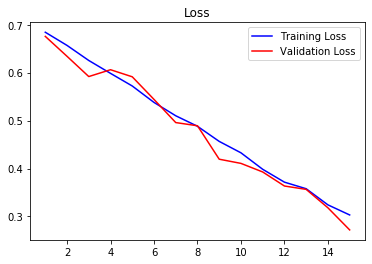

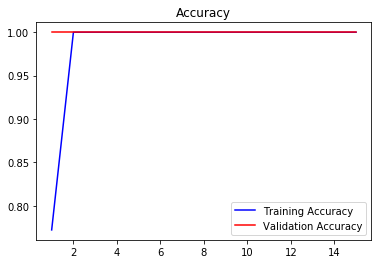

In [26]:
import matplotlib.pyplot as plt
import numpy as np

results = history.history

loss = results['loss']
acc = results['acc']

val_loss = results['val_loss']
val_acc = results['val_acc']


print("Loss : ",np.mean(loss))
print("Accuracy : ", np.mean(acc))
print()
print("Validation_Loss : ", np.mean(val_loss))
print("Validation_Accuracy : ", np.mean(val_acc))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [27]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 20)
print("test_loss : ", test_loss)
print("test_acc : ", test_acc)

Found 9 images belonging to 1 classes.
test_loss :  0.16423587501049042
test_acc :  1.0


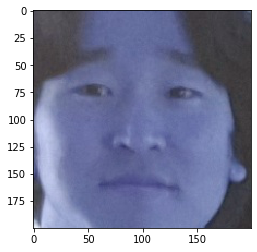

[[myface -> 27.61%]]
[[myface -> 27.61%]]


In [39]:
import cv2

img = cv2.imread('123.jpg')
img2 = img
img = img.astype('float32') / 255
resizing_img = cv2.resize(img, dsize=(224,224), interpolation = cv2.INTER_AREA)
img = resizing_img.reshape((1,224,224,3))
pre = model.predict(img)

plt.imshow(img2)
plt.show()

np.set_printoptions(formatter={'float': lambda x: "myface -> {0:0.2f}%".format(x*100)})
print(pre)
